# Midterm Project — Email Spam Data Analysis

**Dataset:** `emails.csv`  
Rows: **5172**, Columns: **3002**

**Note:** This notebook performs data cleaning, statistical analysis (mean, median, mode, variance, std, correlation) and visualization (histogram, scatter, box plot) on the provided dataset.

In [1]:
# Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"emails.csv")
print("Shape:", df.shape)
df.head()

Shape: (5172, 3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [2]:
# Data overview
print('Columns count:', len(df.columns))
print('\nFirst 10 columns:\n', df.columns[:10])
print('\nInfo:')
display(df.info())
print('\nDescribe (numeric sample):')
display(df.describe().T)

Columns count: 3002

First 10 columns:
 Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou'], dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


None


Describe (numeric sample):


,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [3]:
# === Data Cleaning ===
# 1) Check duplicates
dups = df.duplicated().sum()
print("Duplicate rows count:", dups)
if dups > 0:
    df = df.drop_duplicates()
    print("Dropped duplicates. New shape:", df.shape)

# 2) Check missing values
missing = df.isnull().sum()
missing_nonzero = missing[missing > 0]
print("\nColumns with missing values (count):\n", missing_nonzero)

# If there are any missing numeric values, we will fill them with column median (safe for count data)
for c in missing_nonzero.index:
    if pd.api.types.is_numeric_dtype(df[c]):
        df[c] = df[c].fillna(df[c].median())
    else:
        df[c] = df[c].fillna(df[c].mode().iloc[0])

print("\nAfter filling, total missing:", df.isnull().sum().sum())

# 3) Ensure numeric columns are numeric (replace commas if needed)
for col in df.columns:
    if df[col].dtype == object:
        try:
            df[col] = df[col].str.replace(',', '.').astype(float)
        except Exception:
            pass  # non-numeric column, ignore

print("Final shape after cleaning:", df.shape)

Duplicate rows count: 0

Columns with missing values (count):
 Series([], dtype: int64)

After filling, total missing: 0
Final shape after cleaning: (5172, 3002)


In [9]:
# === Statistical summary ===
from scipy import stats

# Select numeric columns (exclude identifier and target)
cols = df.columns.tolist()
identifier = cols[0]  # e.g., 'Email No.'
target = "Prediction"

numeric = [c for c in df.columns if c not in (identifier, target) and pd.api.types.is_numeric_dtype(df[c])]

print("Number of numeric features:", len(numeric))
# Calculate statistics for top features (by variance) and target relation
# Compute overall mean, median, mode, var, std for selected columns
selected = numeric[:10]  # first 10 numeric features for summary (adjustable)
stats_list = []
for c in selected:
    series = df[c].dropna()
    mode = series.mode().iloc[0] if not series.mode().empty else np.nan
    stats_list.append({
        'feature': c,
        'mean': series.mean(),
        'median': series.median(),
        'mode': mode,
        'variance': series.var(),
        'std': series.std()
    })

stats_df = pd.DataFrame(stats_list)
display(stats_df)

# Correlation matrix (numeric features + target)
corr = df[numeric + [target]].corr()
print("\nCorrelation with target (Prediction):")
corr_with_target = corr[target].sort_values(ascending=False)
display(corr_with_target.head(20))


Number of numeric features: 3000


,feature,mean,median,mode,variance,std
0,the,6.640565,3.0,0,137.945235,11.745009
1,to,6.188128,3.0,0,90.908132,9.534576
2,ect,5.143852,1.0,1,198.842192,14.101142
3,and,3.075599,1.0,0,36.553750,6.045970
4,for,3.124710,2.0,1,21.907283,4.680522
5,of,2.627030,1.0,0,38.810973,6.229845
6,a,55.517401,28.0,3,7669.235628,87.574172
7,you,2.466551,1.0,0,18.614429,4.314444
8,hou,2.024362,0.0,0,48.551331,6.967878
9,in,10.600155,5.0,0,371.791359,19.281892



Correlation with target (Prediction):


Prediction      1.000000
more            0.258152
our             0.228187
able            0.222219
best            0.221703
ur              0.220253
sex             0.220092
sec             0.217402
money           0.217215
soft            0.213382
dr              0.212413
mo              0.210056
via             0.204031
prescription    0.203896
remove          0.203384
cheap           0.200348
meds            0.198501
drug            0.197976
of              0.197234
ali             0.194936
Name: Prediction, dtype: float64

Scatter columns: e t
Histogram column: e
Box plot columns: ['the', 'to', 'ect', 'and', 'for']


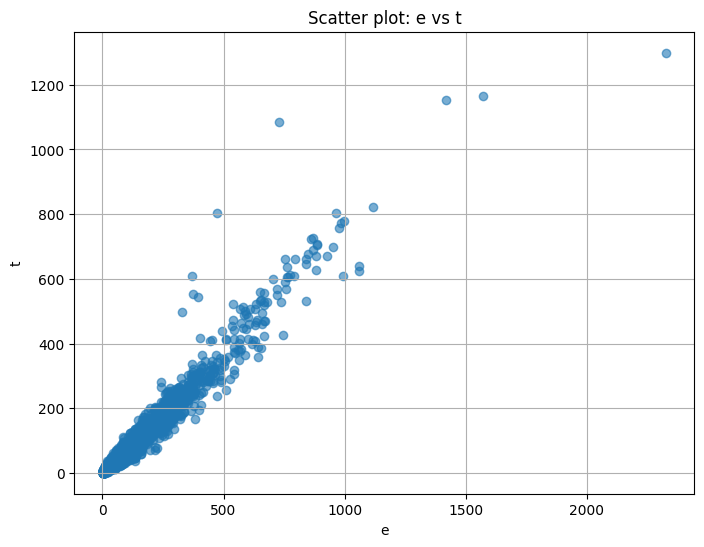

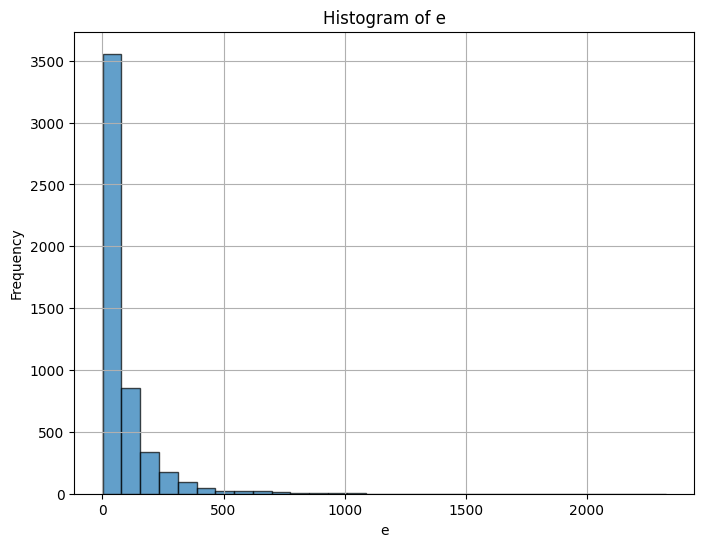

/var/folders/d4/wnjwdths2fz6m3nl5831ys4c0000gn/T/ipykernel_55653/2032224899.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box.values, labels=data_for_box.columns, showfliers=True)


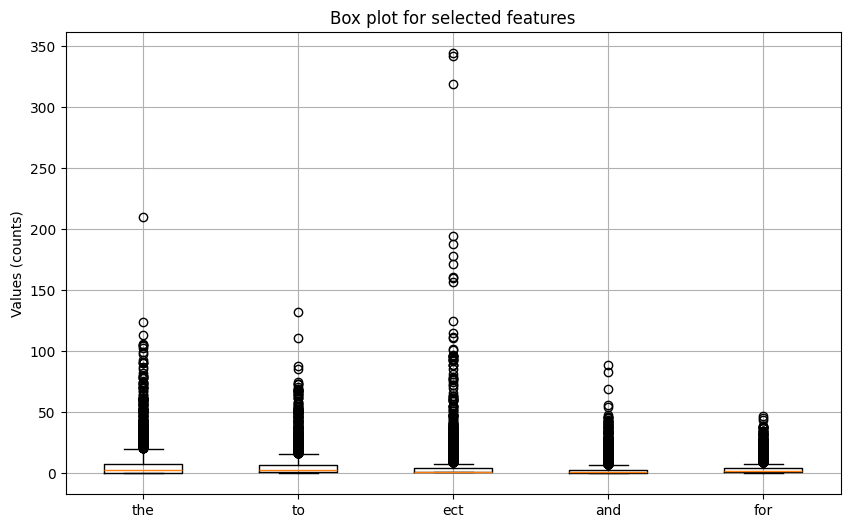

In [12]:
# === Visualization ===
%matplotlib inline
import matplotlib.pyplot as plt

# Columns chosen automatically based on frequency sums
scatter_x = "e"
scatter_y = "t"
hist_col = "e"
box_cols = ['the', 'to', 'ect', 'and', 'for']

print("Scatter columns:", scatter_x, scatter_y)
print("Histogram column:", hist_col)
print("Box plot columns:", box_cols)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df[scatter_x], df[scatter_y], alpha=0.6)
plt.title(f"Scatter plot: {scatter_x} vs {scatter_y}")
plt.xlabel(scatter_x)
plt.ylabel(scatter_y)
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(8,6))
plt.hist(df[hist_col].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {hist_col}")
plt.xlabel(hist_col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot (for multiple columns)
plt.figure(figsize=(10,6))
data_for_box = df[box_cols].dropna()
plt.boxplot(data_for_box.values, labels=data_for_box.columns, showfliers=True)
plt.title("Box plot for selected features")
plt.ylabel("Values (counts)")
plt.grid(True)
plt.show()


In [ ]:
# === Correlation Heatmap for Top 20 Features ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Загружаем CSV-файл
df = pd.read_csv('/Users/aigerim/emails.csv')

# 2️⃣ Определяем числовые столбцы (кроме 'Email No.' и 'Prediction')
numeric = [c for c in df.columns if c not in (df.columns[0], 'Prediction') 
           and pd.api.types.is_numeric_dtype(df[c])]

# 3️⃣ Берём топ-20 признаков с наибольшей дисперсией (вариацией)
top_by_var = df[numeric].var().sort_values(ascending=False).index.tolist()[:20]

# 4️⃣ Вычисляем корреляцию только между этими признаками
corr_sub = df[top_by_var].corr()

# 5️⃣ Строим тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_sub,
    cmap='coolwarm',       # цветовая схема
    annot=True,            # подписать значения
    fmt=".2f",             # формат значений
    square=True,           # клетки квадратные
    cbar_kws={'label': 'Correlation'}  # название шкалы
)
plt.title('Correlation Heatmap (Top 20 Features by Variance)', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined